In [248]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [249]:
import os
import matplotlib
import matplotlib.pyplot as plt
import glob
import math
import numpy as np
import pandas as pd
from bisect import *
from decimal import Decimal

In [250]:
dir = '/Users/innocent/cernbox/HepSpec/fragData/'
file = dir+'perfMonAMD1.log'
amd = True
#file = dir+'perfMonLongA.log'
#amd = False

In [251]:
columns = ['time','rawValue','unit','name','count','frac','metricValue','metric']
perfRaw =  pd.read_csv(file, delimiter=",",names=columns)
perfRaw['metric'] = perfRaw['metric'] +'_' + perfRaw['name']

In [252]:
clus=perfRaw
print(clus.index)
print(clus.columns)
print(clus.size)
print(clus.describe())
print(clus.head(25))
print(clus.tail())

RangeIndex(start=0, stop=12500, step=1)
Index(['time', 'rawValue', 'unit', 'name', 'count', 'frac', 'metricValue',
       'metric'],
      dtype='object')
100000
               time      rawValue         count          frac   metricValue
count  12500.000000  1.197900e+04  1.197900e+04  11979.000000  12500.000000
mean    2635.854629  1.371438e+11  1.144344e+11     55.175308     22.528904
std     1519.113057  3.526064e+11  7.755101e+10     32.721810     76.379031
min       10.049709  0.000000e+00  2.009933e+10     31.230000      0.000000
25%     1323.009689  1.975242e+06  7.569698e+10     31.250000      0.850000
50%     2636.620708  2.289798e+09  7.580652e+10     31.250000      2.332000
75%     3950.189692  1.548182e+10  2.413580e+11    100.000000     14.390500
max     5263.055708  1.561873e+12  2.443287e+11    100.000000   2263.470000
         time      rawValue  unit  \
0   10.049709  2.412896e+05  msec   
1   10.049709  2.086369e+10   NaN   
2   10.049709  6.273580e+07   NaN   
3   10

In [253]:
raw = perfRaw.pivot(index='time', columns='name', values='rawValue')
#raw = raw[raw['cycles']>250000000000.]

In [254]:
metrics = perfRaw.pivot(index='time', columns='metric', values='metricValue')
metrics = metrics[metrics['GHz_cycles']>0.59]

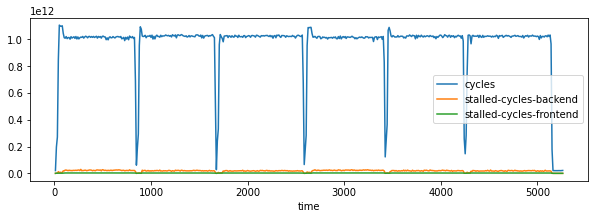

In [255]:
fig, axs = plt.subplots(figsize=(10, 3))
raw['cycles'].plot()
if amd :
 raw['stalled-cycles-backend'].plot()
 raw['stalled-cycles-frontend'].plot()
else :
 raw['cycle_activity.stalls_total'].plot()
 raw['cycle_activity.stalls_mem_any'].plot()
axs.legend()
plt.show()

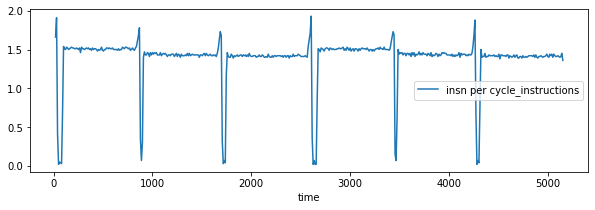

In [256]:
fig, axs = plt.subplots(figsize=(10, 3))
metrics['insn per cycle_instructions'].plot()
axs.legend()
plt.show()

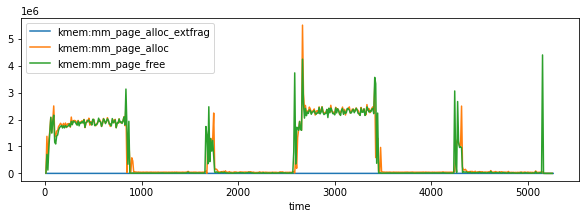

In [257]:
fig, axs = plt.subplots(figsize=(10, 3))
raw['kmem:mm_page_alloc_extfrag'].plot()
raw['kmem:mm_page_alloc'].plot()
raw['kmem:mm_page_free'].plot()
axs.legend()
plt.show()

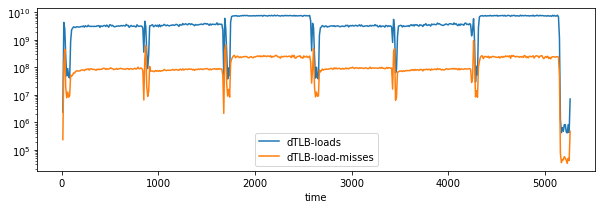

In [258]:
fig, axs = plt.subplots(figsize=(10, 3))
raw['dTLB-loads'].plot()
raw['dTLB-load-misses'].plot()
axs.legend()
plt.yscale("log")
plt.show()

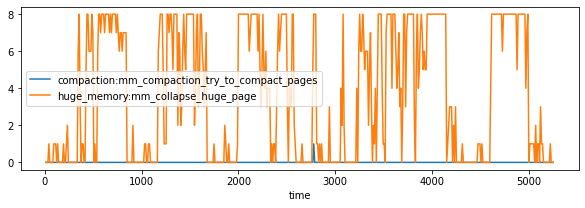

In [259]:
if amd: 
    fig, axs = plt.subplots(figsize=(10, 3))
    raw['compaction:mm_compaction_try_to_compact_pages'].plot()
    raw['huge_memory:mm_collapse_huge_page'].plot()
    axs.legend()
    #plt.yscale("log")
    plt.show()